# **Кейс №3. Моделирование. Алексеев Виталий**

## **0 Импорт библиотек**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

plt.style.use('ggplot')
plt.rcParams["axes.facecolor"] = "white"

## **1 Алгоритм А**

Определимся с некоторыми понятиями. Зададим следующий индикатор:
$$X_i=\begin{cases}1,\text{ если $i$-й клиент кликнул на кнопку}\\
0,\text{ иначе}\end{cases}\implies X_i\sim\text{Be}(p)$$
где $p$ - искомая конверсия в генеральной совокупности.

Тогда случайная величина, заданная как сумма всех индикаторов:
$$Y=\sum_{i=1}^N X_i\implies Y\sim\text{Bin}(N,p)$$
где $N$ - кол-во клиентов в выборке.

_Подход A:_ однократное тестирование на малой выборке 200 визитов переадресуют на страницу с новым дизайном кнопки.
- Если конверсия выше 21% — внедряют новый дизайн.
- Если конверсия 21% и ниже — оставляют старый дизайн.

На языке вероятностей этой значит следующее. Пусть:
$$Y_A\sim\text{Bin}(200,\;18\%)$$
_Искомая конверсия $p$ известна из условия._

Тогда дизайн внедряется при условии:
$$\frac{Y_A}{200}>0,21\iff Y_A > 42$$
Вероятность этого:
$$\mathbf{P}(Y_A>42)=1-\mathbf{P}(Y_A\le42)=1-CDF_{Y_A}(42)$$

In [9]:
print(f"P(Y_A > 42) = {(1 - sps.binom(200, 0.18).cdf(42)) * 100:.2f}%")

P(Y_A > 42) = 11.72%


### **Разъяснение инцидента**
Вероятность внедрить дизайн, т.е. принять искомую конверсию $p$ не меньше 21% небольшая, но все-таки существенная, немногим меньше 12%, в связи с чем допустить ошибку довольно просто, что собственно и произошло. Полагаться на случайность здесь было по меньшей мере, неграмотно.

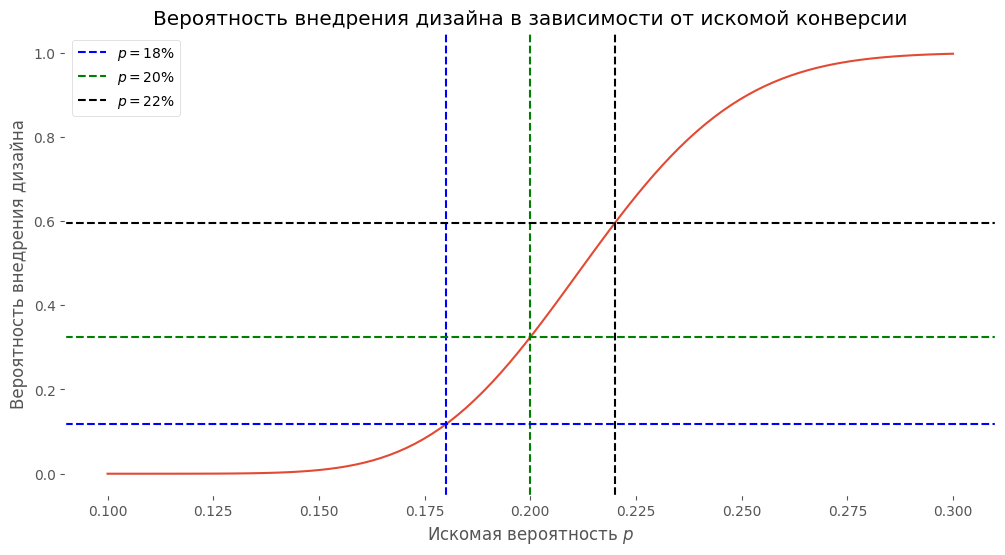

In [43]:
p_a = np.linspace(0.1, 0.3, 100)

plt.figure(figsize=(12, 6))
plt.title("Вероятность внедрения дизайна в зависимости от искомой конверсии")
plt.xlabel("Искомая вероятность $p$")
plt.ylabel("Вероятность внедрения дизайна")

plt.plot(p_a, 1 - sps.binom(200, p_a).cdf(42))

plt.axvline(0.18, linestyle='--', label=r"$p=18\%$", color='b')
plt.axvline(0.20, linestyle='--', label=r"$p=20\%$", color='g')
plt.axvline(0.22, linestyle='--', label=r"$p=22\%$", color='k')

plt.axhline(1 - sps.binom(200, 0.18).cdf(42), linestyle='--', color='b')
plt.axhline(1 - sps.binom(200, 0.20).cdf(42), linestyle='--', color='g')
plt.axhline(1 - sps.binom(200, 0.22).cdf(42), linestyle='--', color='k')

plt.legend()
plt.show()

## **2 Алгоритм B**

От предудещего отличается лишь числом клиентов $N$:
$$Y_B\sim\text{Bin}(1000, 18\%)$$
Тогда вероятность внедрить дизайн:
$$\mathbf{P}\left(\frac{Y_B}{1000}>0,21\right)=1-\mathbf{P}(Y_B\le210)=1-CDF_{Y_B}(210)$$

In [26]:
print(f"P(Y_B > 210) = {(1 - sps.binom(1000, 0.18).cdf(210)) * 100:.2f}%")

Y_B > 210 = 0.68%


Вероятность при данном подходе на 2 порядка меньше той, что получена алгоритмом A. Учитывая, что тесты проводились независимо, то вероятность повторения ситуации:

In [30]:
print(f"P(инцидент повторится) = {(1 - sps.binom(200, 0.18).cdf(42)) * (1 - sps.binom(1000, 0.18).cdf(210)) * 100:.2f}%")

P(инцидент повторится) = 0.08%


## **3 Сравнение подходов A и B**

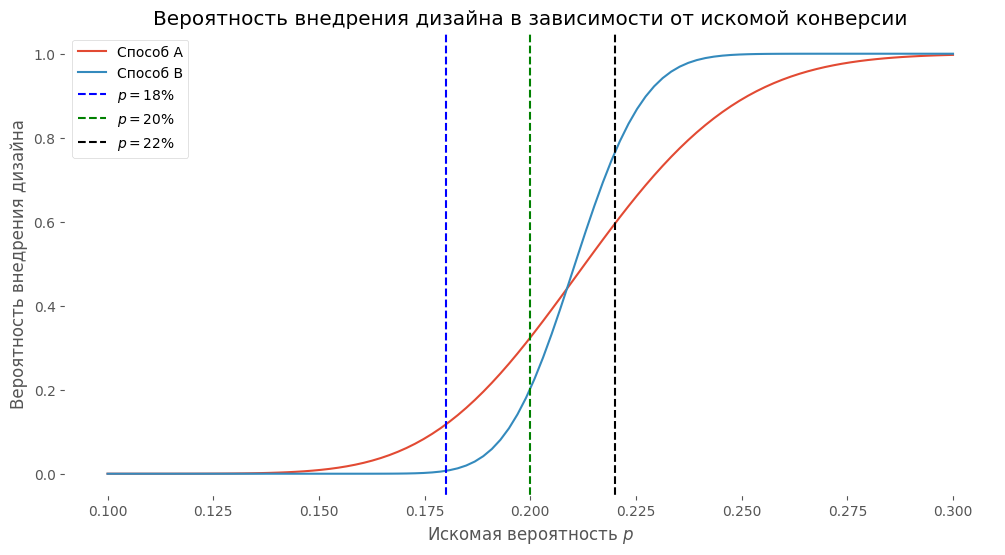

In [50]:
p_b = np.linspace(0.1, 0.3, 100)

plt.figure(figsize=(12, 6))

plt.plot(p_a, 1 - sps.binom(200, p_a).cdf(42), label="Способ A")
plt.plot(p_b, 1 - sps.binom(1000, p_b).cdf(210), label="Способ B")

plt.axvline(0.18, linestyle='--', label=r"$p=18\%$", color='b')
plt.axvline(0.20, linestyle='--', label=r"$p=20\%$", color='g')
plt.axvline(0.22, linestyle='--', label=r"$p=22\%$", color='k')

plt.title("Вероятность внедрения дизайна в зависимости от искомой конверсии")
plt.xlabel("Искомая вероятность $p$")
plt.ylabel("Вероятность внедрения дизайна")

plt.legend()
plt.show()

Способ B гораздо лучше "отсеивает" дизайны с малой искомой конверсией ($p\le20\%$), поскольку для данных значений вероятность внедрить дизайн по способу B в разы меньше, чем согласно способу A. В то же время он лучше обнаруживает дизайны с высокой конверсией ($p>21\%$), поскольку здесь та же вероятность становится больше вероятности по алгоритму A.

Однако в небольшом промежутке ($20\%<p<21\%$), алгоритм B не обнаруживает увеличение конверсии, как следствие более выгодный дизайн отклоняется, потенциальная прибыль теряется.

## **4 Алгоритм C**

Данный алгоритм предлагает двухэтапное тестирование, поскольку этапы проводятся независимо (второй тест проводится только после успеха второго, однако на вопрос о внедрении дизайна данный факт совершенно не влияет). Имеем:
$$Y_{C_1}\sim\text{Bin}(200,18\%),\quad Y_{C_2}\sim\text{Bin}(800,18\%)$$
Новый дизайн внедряется, если выполнены оба условия:
$$\begin{cases}Y_{C_1}>40\\Y_{C_2}>160\end{cases}\implies \mathbf{P}(Y_{C_1}>40\cap Y_{C_2}>160)=\left(1-CDF_{Y_{C_1}}(40)\right)\cdot\left(1-CDF_{Y_{C_2}}(160)\right)$$

In [51]:
print(f"P(Внедрить дизайн по способу C | p = 18%) = {(1 - sps.binom(200, 0.18).cdf(40)) * (1 - sps.binom(800, 0.18).cdf(160)) * 100:.2f}%")

P(Внедрить дизайн по способу C | p = 18%) = 1.33%


Заметим, что мы получили вероятность больше, чем при использовании способа B, поэтому и вероятность повторения инцидента будет больше, примерно в 2 раза.

## **5 Сравнение алгоритмов B и C**

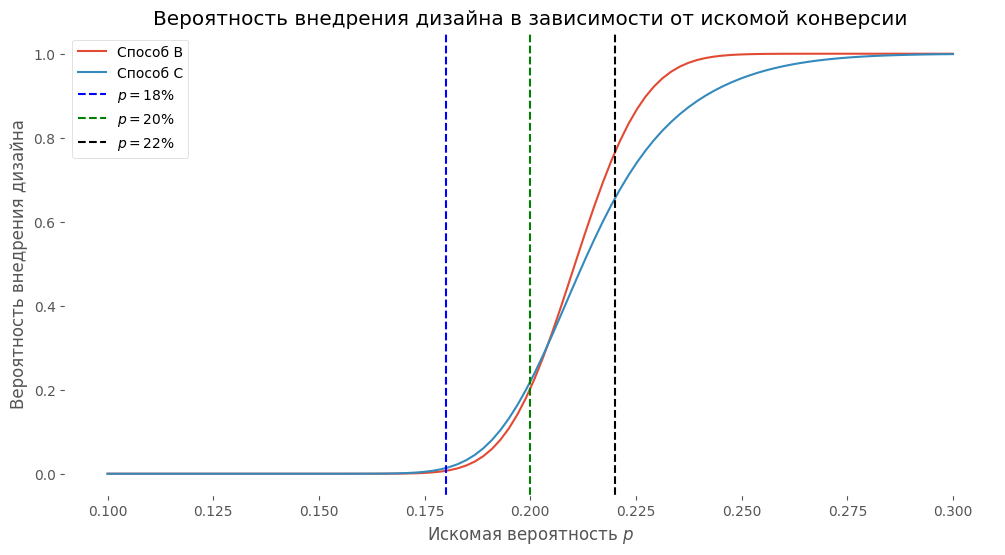

In [54]:
p_c = np.linspace(0.1, 0.3, 100)

plt.figure(figsize=(12, 6))

plt.plot(p_b, 1 - sps.binom(1000, p_b).cdf(210), label="Способ B")
plt.plot(p_c, (1 - sps.binom(200, p_c).cdf(40)) * (1 - sps.binom(800, p_c).cdf(160)), label="Способ C")

plt.axvline(0.18, linestyle='--', label=r"$p=18\%$", color='b')
plt.axvline(0.20, linestyle='--', label=r"$p=20\%$", color='g')
plt.axvline(0.22, linestyle='--', label=r"$p=22\%$", color='k')

plt.title("Вероятность внедрения дизайна в зависимости от искомой конверсии")
plt.xlabel("Искомая вероятность $p$")
plt.ylabel("Вероятность внедрения дизайна")

plt.legend()
plt.show()

Аналогично предыдущим размышления, с точки зрения статистической значимости, способ B гораздо лучше способа C. Но в то же время эта разница не слишком велика, но затраты на тестирование по способу C будут в разы меньше чем по способу B, поскольку последний предполагает тестирование для достаточно большого числа клиентов - 1000, в то время как в большинстве случаев, тестирование по алгоритму C потребует лишь 200.

## **6 Алгоритм D**

Алгоритм продолжает идею предыдущего, однако теперь количество этапов кратно увеличивается, что еще больше поможет упростить проведение тестирования и снизить его стоимость. Имеем:
$$Y_{start}\sim\text{Bin}(200, 18\%)$$
На следующий этап переоходим при выполнении:
$$\frac{Y_{start}}{N}>19,6\%$$
Далее $N$ увеличивается на единицу и алгоритм начинается сначала пока либо $N$ не превзойдет 1000, либо на каком-то из этапов конверсия окажется ниже указанной.

In [70]:
N_monte_carlo = 1000

def approach_d(p):
    success = 0

    for _ in range(N_monte_carlo):
        outcomes = sps.bernoulli.rvs(p, size=1000)

        n = 200
        hits = outcomes[:n].sum()
        conv = hits / n

        while conv > 0.196 and n < 1000:
            n += 1
            hits += outcomes[n - 1]
            conv = hits / n

        if n == 1000 and conv > 0.196:
            success += 1

    return success / N_monte_carlo


In [80]:
print(f"P(Внедрить при способе C | p = 18%) = {approach_d(0.18) * 100:.2f}%)")

P(Внедрить при способе C | p = 18%) = 1.70%)


Получили вероятность еще бОльшую, чем при алгоритме C, поэтому вероятность повторения инцидента будет в 3 раза выше, чем при использовании метода B. Однако сам алгоритм D основывается на случайности, поэтому оценка такого подхода невозможна без детального углубления в работу алгоритма.

## **7 Сравнение подходов C и D**

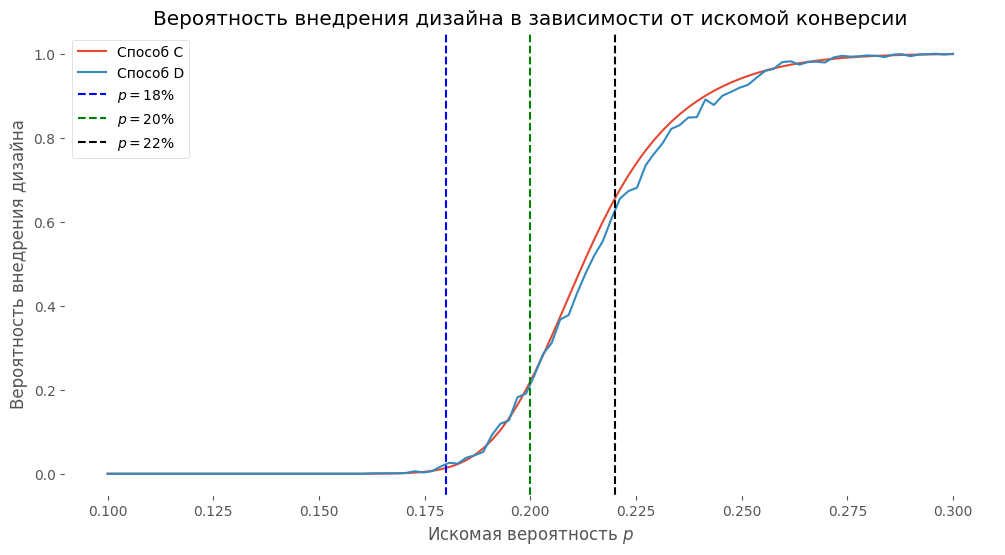

In [81]:
p_d = np.linspace(0.1, 0.3, 100)

plt.figure(figsize=(12, 6))

plt.plot(p_c, (1 - sps.binom(200, p_c).cdf(40)) * (1 - sps.binom(800, p_c).cdf(160)), label="Способ C")
plt.plot(p_d, [approach_d(p) for p in p_d], label="Способ D")

plt.axvline(0.18, linestyle='--', label=r"$p=18\%$", color='b')
plt.axvline(0.20, linestyle='--', label=r"$p=20\%$", color='g')
plt.axvline(0.22, linestyle='--', label=r"$p=22\%$", color='k')

plt.title("Вероятность внедрения дизайна в зависимости от искомой конверсии")
plt.xlabel("Искомая вероятность $p$")
plt.ylabel("Вероятность внедрения дизайна")

plt.legend()
plt.show()

Основное преимущество алгоритма C - использование математической функции, которая не зависит от случайности, т.е. ее значение точно и определено всегда одинаково, в то время как алгоритм D целиком полагается на случайность, хоть метод Монте-Карло позволяет ее "сгладить" (график получился максимально приближенный) все равно всегда есть небольшой шанс получить сильно завышенные / заниженные результаты.

Но в то же время алгоритм D использует еще более щадящую с экономической точки зрения стратегию: вместо того, чтобы разом внедрять новый дизайн для 1000 / 800 человек, он внедряет лишь до 200, после чего добавляет небольшое число клиентов, вследствие чего если конверсия и правда окажется меньше текущей, потери прибыли окажутся минимально возможными.

## **Анализ алгоритма D**

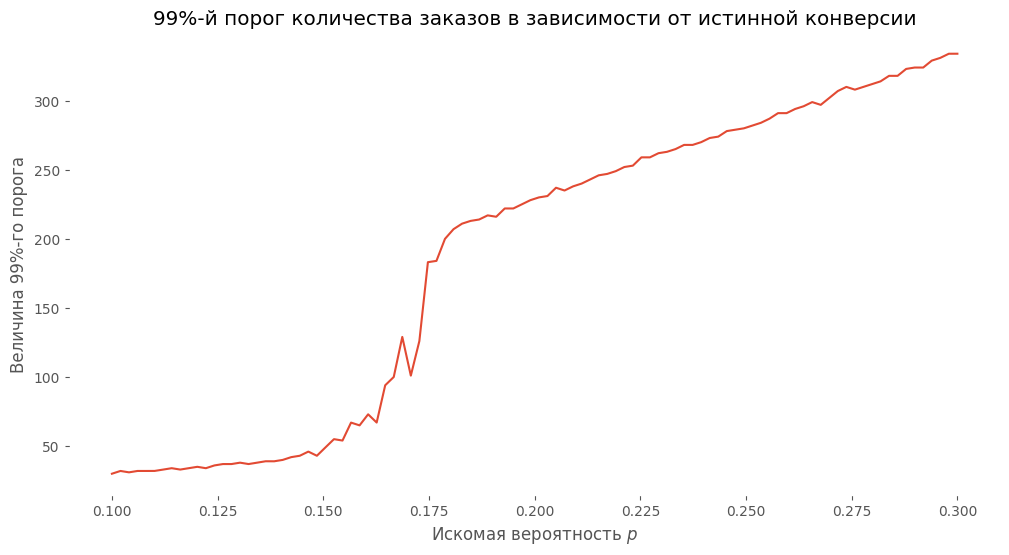

In [82]:
def approach_d_orders(p):
    orders = np.empty(N_monte_carlo, dtype=int)

    for i in range(N_monte_carlo):
        outcomes = sps.bernoulli.rvs(p, size=1000)

        n = 200
        hits = outcomes[:n].sum()
        conv = hits / n

        while conv > 0.196 and n < 1000:
            n += 1
            hits += outcomes[n - 1]
            conv = hits / n

        orders[i] = hits

    return orders


p_grid = np.linspace(0.10, 0.30, 100)

q99_orders = []
for p in p_grid:
    orders = approach_d_orders(p)
    q99 = np.quantile(orders, 0.99)
    q99_orders.append(q99)

q99_orders = np.array(q99_orders)

plt.figure(figsize=(12, 6))
plt.plot(p_grid, q99_orders)

plt.title("99%-й порог количества заказов в зависимости от истинной конверсии")
plt.xlabel("Искомая вероятность $p$")
plt.ylabel("Величина 99%-го порога")

plt.show()

График ясно отражает последнюю мысль из предыдущего пункта об экономической выгоде: данный метод позволяет снизить число необходимых показов для дизайнов с очень малой конверсией ($p\le 15\%$), поскольку эти дизайны не имело бы смысла рассматривать вовсе, рассматривать минимально возможное число раз (как видно из графика, зачастую имеем менее 50 показов) - уже большой плюс для бизнеса.